___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 5<br><br>CNN Syntax Basics<br><br>MNIST Data<br><h1>

# Dataset Info

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset. The original creators of the database keep a list of some of the methods tested on it. In their original paper, they use a support-vector machine to get an error rate of 0.8%.

![3Dto2D](https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/320px-MnistExamples.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
# import tensorflow as tf

# tf.config.list_physical_devices("GPU")

[]

# Recognizing and Understanding Data

In [2]:
from tensorflow.keras.datasets.mnist import load_data    # To load the MNIST digit dataset

# We split the data into train and test sets.

(X_train, y_train) , (X_test, y_test) = load_data()      # Loading data

In [73]:
X_train.shape

(60000, 28, 28, 1)

In [74]:
X_test.shape

(10000, 28, 28, 1)

In [3]:
load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
len(load_data())

2

In [5]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [6]:
# Checking the shape of one image
X_train[9].shape

(28, 28)

In [7]:
X_train[9]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0, 189, 190,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0, 143, 247, 153,   0,   0,
          0,   0],
       [  

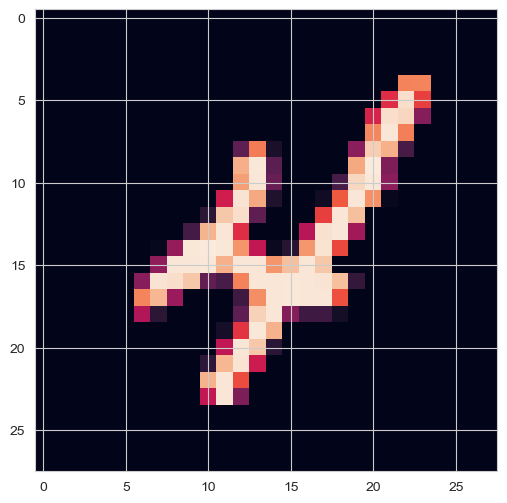

In [8]:
plt.imshow(X_train[9])
#plt.matshow(X_train[9])

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

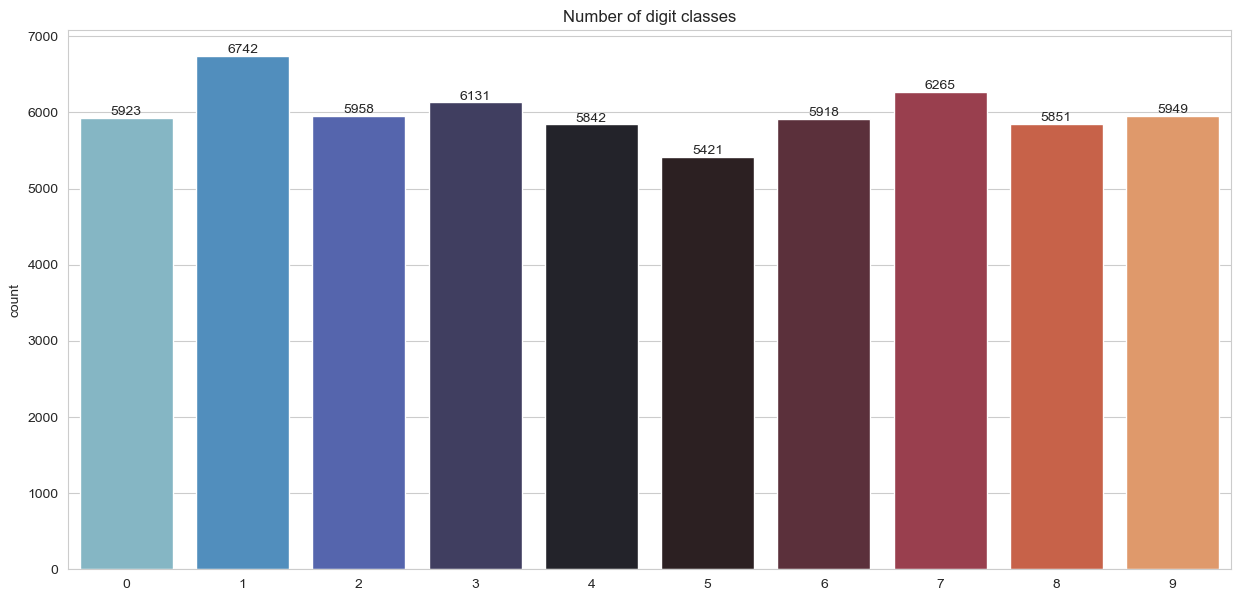

In [70]:
# visualize number of digits classes

plt.figure(figsize=(15,7))
ax = sns.countplot(y_train, palette="icefire")
plt.title("Number of digit classes")

for container in ax.containers:
    ax.bar_label(container)

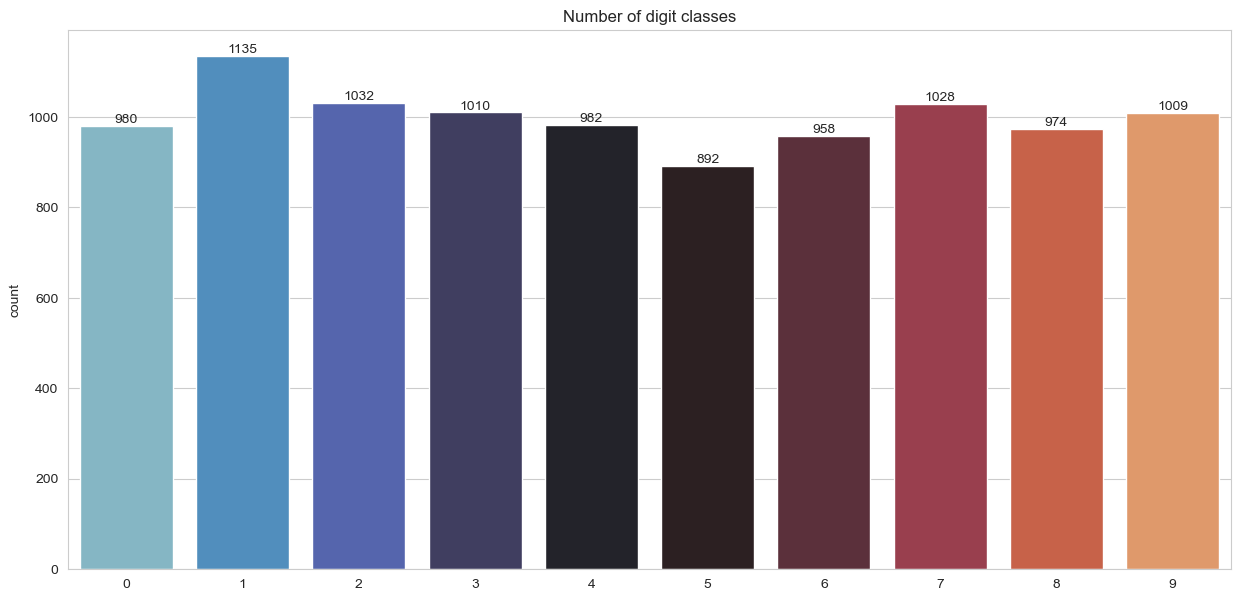

In [75]:
# visualize number of digits classes

plt.figure(figsize=(15,7))
ax = sns.countplot(y_test, palette="icefire")
plt.title("Number of digit classes")

for container in ax.containers:
    ax.bar_label(container)

In [10]:
y_train[9]

4

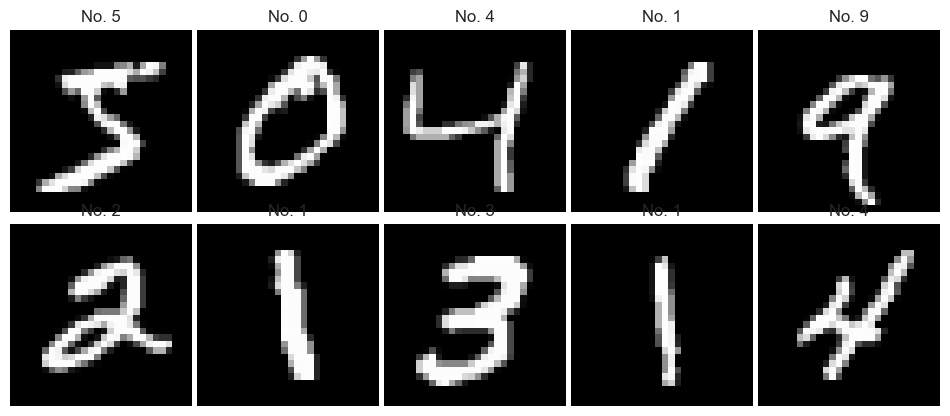

In [11]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title('No. %d' % y_train[image_index])
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        
plt.tight_layout()
plt.show()
plt.close()

# Data Preprocessing

**Normalization**

We perform a grayscale normalization to reduce the effect of illumination's differences.
If we perform normalization, CNN works faster.

In [12]:
X_train[9].min()

0

In [13]:
X_train[9].max()

255

In [14]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# manuel olarak scale etmiş olduk.

In [15]:
X_train[9].min()

0.0

In [16]:
X_train[9].max()

1.0

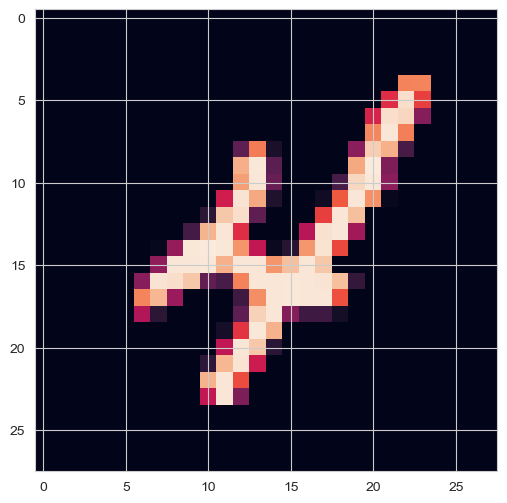

In [17]:
plt.imshow(X_train[9])

In [18]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

**Reshape**

Train and test images (28 x 28)
We reshape all data to 28x28x1 3D matrices.
Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel.

In [19]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [20]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [21]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# modelimi oluşturmadan önce matrislerin her birini 28, 28, 1 moduna çevirdim. burada 1, siyah beyaz olduğunu ifade ediyor. 

In [22]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [23]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [24]:
y_train.shape

(60000,)

**Label Encoding**

Encode labels to one hot vectors
2 => [0,0,1,0,0,0,0,0,0,0]
4 => [0,0,0,0,1,0,0,0,0,0]

In [25]:
from tensorflow.keras.utils import to_categorical

In [26]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [27]:
y_train[9]

4

In [28]:
Y_train[9]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

## Convolutional Neural Network

**CNN is used for image classification, object detection**

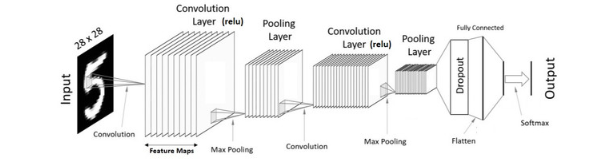

### What is Convolution Operation?

- We have some image and feature detector(3*3)

- Feature detector does not need to be 3 by 3 matrix. It can be 5 by 5 or 7 by 7.

- Feature detector = kernel = filter

- Feauture detector detects features like edges or convex shapes. Example, if out input is dog, feature detector can detect features like ear or tail of the dog.

- feature map = conv(input image, feature detector). Element wise multiplication of matrices.

- feature map = convolved feature

- Stride = navigating in input image.

- We reduce the size of image. This is important bc code runs faster. However, we lost information.

- We create multiple feature maps bc we use multiple feature detectors(filters).

- Lets look at gimp. Edge detect: [0,10,0],[10,-4,10],[0,10,0]

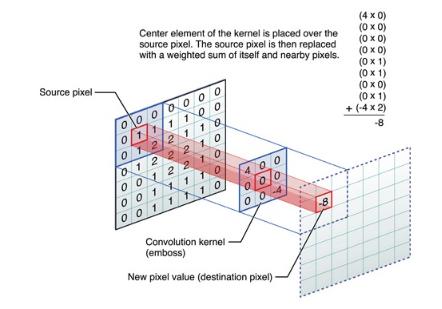

**After having convolution layer we use ReLU to break up linearity. Increase nonlinearity. Because images are non linear.**

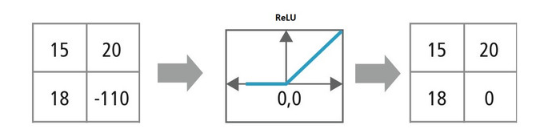

**Same Padding - Valid Padding**

- As we keep applying conv layers, the size of the volume will decrease faster than we would like. In the early layers of our network, we want to preserve as much information about the original input volume so that we can extract those low level features.

- input size and output size are same.

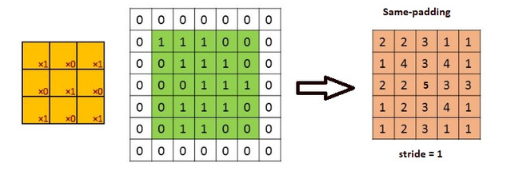

**Max Pooling**

- It makes down-sampling or sub-sampling (Reduces the number of parameters)

- It makes the detection of features invariant to scale or orientation changes.

- It reduce the amount of parameters and computation in the network, and hence to also control overfitting.

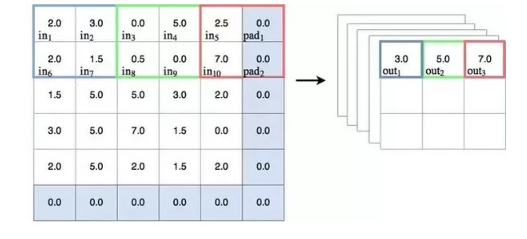

**Flattening**

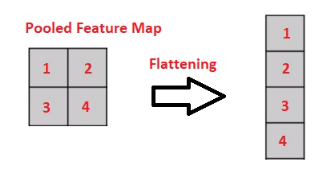

**Full Connection**

- Neurons in a fully connected layer have connections to all activations in the previous layer

- Artificial Neural Network

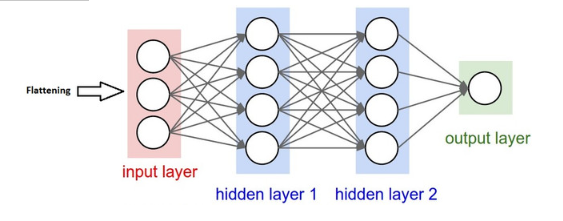

## Implementing with Keras

### Create Model

- conv => max pool => dropout => conv => max pool => dropout => fully connected (2 layer)

- Dropout: Dropout is a technique where randomly selected neurons are ignored during training
    
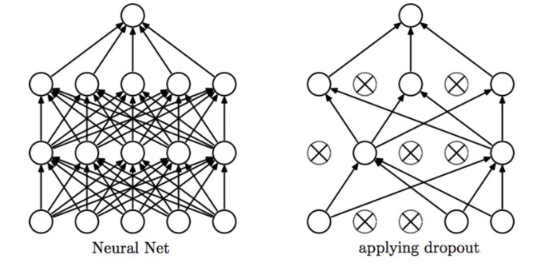

# Modeling

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

# modelimin ihtiyacı olacak layerlerı import ettim. (Dense, Conv2D, MaxPool2D, Flatten)

In [31]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) # stride = 1, padding = valid 

# filters, biz image'e bağlı olarak biz belirliyoruz. kernel size'ı da aynı şekilde.

model.add(MaxPool2D(pool_size=(2, 2))) # stride = pool size, padding = valid

# pool_size belirlemezsen otomatik 2,2 pool oluşturup verileri öyle çeker.

model.add(Flatten())

# matrisleri vektöre dönüştürecek.

model.add(Dense(128, activation='relu'))

# nöron sayısı 128 olsun. activation relu olsun. model Dence'te eğitilecek

model.add(Dense(10, activation='softmax'))

# çıkış için 10 nöron olsun. çıkış activation u softmax olsun (classification yaptığımız için softmax'ı kullanmak zorundayız)

model.compile(loss='categorical_crossentropy',  # At this time we use categorical crossentropy. That means that we have multi class.
              optimizer='adam',
              metrics=['accuracy'])

# Conv2D layer'ı için: 3'e 3'lük 32 filtre koy. input_shape 28,28,1 olsun. dedim

# genelde 28 lik, 32 lik fotoğraflar için 2,2 pool idealdir. MaxPool2D layer ı için 2,2 belirledik.

# multi_class olduğundan categorical_crossentropy kullanıldı. Binary olsaydı binary_crossentropy kullanılacaktı

**A sample example showing the conversion of 3D data to 2D**
![3Dto2D](https://dphi-courses.s3.ap-south-1.amazonaws.com/Deep+Learning+Bootcamp/3D+to++2D.png)

In [32]:
# CNN çok çabuk overfitting e gidebilir

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [30]:
((3 * 3 * 1) + 1) * 32

320

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

**Epochs and Batch Size**

- Say you have a dataset of 10 examples (or samples). You have a batch size of 2, and you've specified you want the algorithm to run for 3 epochs. Therefore, in each epoch, you have 5 batches (10/2 = 5). Each batch gets passed through the algorithm, therefore you have 5 iterations per epoch.

- reference: https://stackoverflow.com/questions/4752626/epoch-vs-iteration-when-training-neural-networks

In [36]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])


Epoch 1/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1524 - accuracy: 0.9542 - val_loss: 0.0685 - val_accuracy: 0.9785
Epoch 2/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0504 - accuracy: 0.9842 - val_loss: 0.0422 - val_accuracy: 0.9857
Epoch 3/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0327 - accuracy: 0.9898 - val_loss: 0.0435 - val_accuracy: 0.9859
Epoch 4/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0230 - accuracy: 0.9922 - val_loss: 0.0442 - val_accuracy: 0.9847


In [37]:
model.metrics_names

['loss', 'accuracy']

In [38]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.152,0.954,0.069,0.979
1,0.050,0.984,0.042,0.986
2,0.033,0.990,0.044,0.986
3,0.023,0.992,0.044,0.985


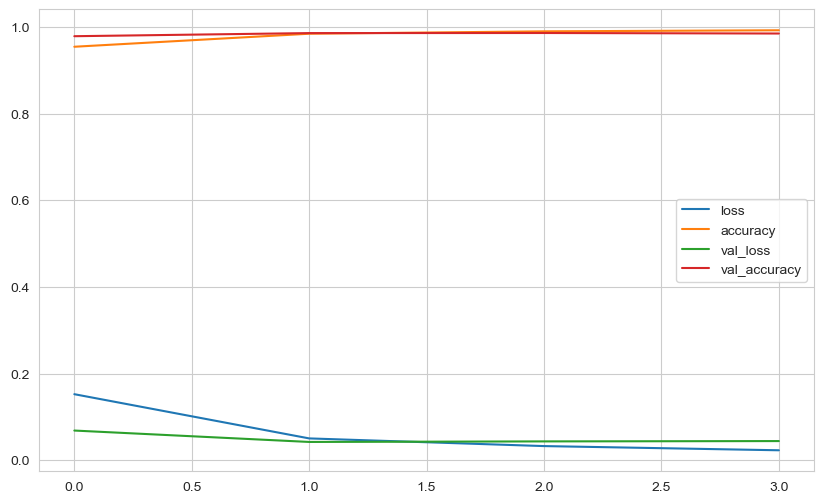

In [39]:
summary.plot();

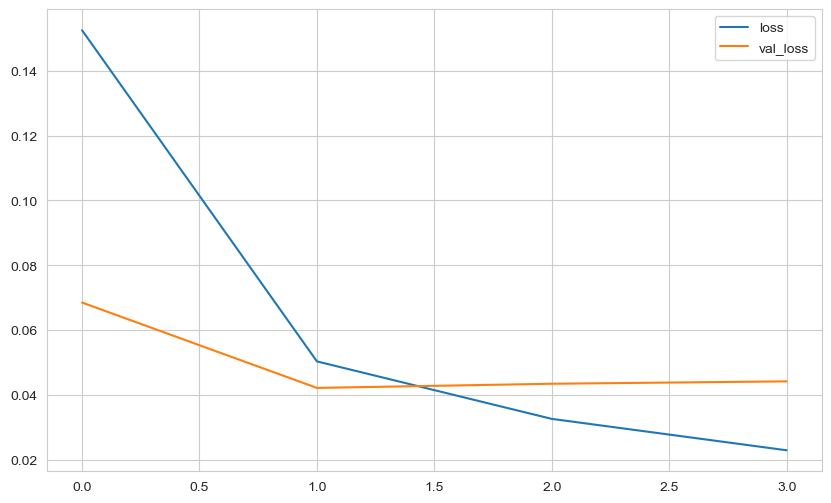

In [40]:
summary[["loss", "val_loss"]].plot();

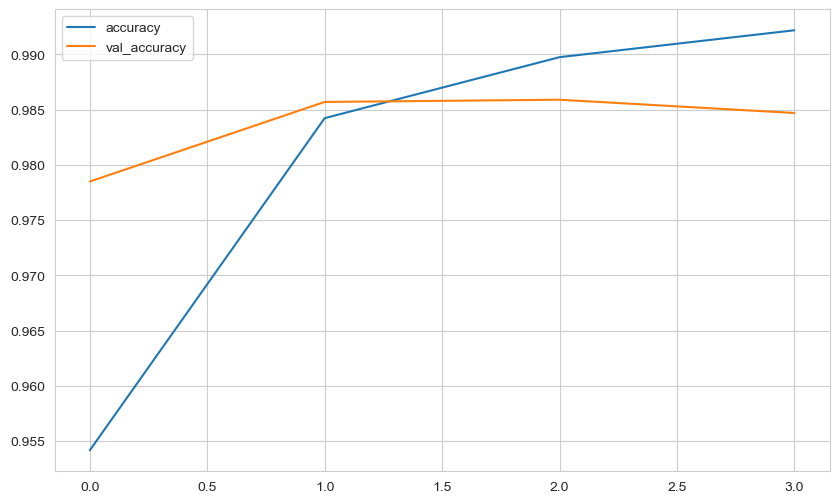

In [41]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.0422 - accuracy: 0.9857


[0.042221687734127045, 0.9857000112533569]

In [44]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.042221687734127045
Test accuracy: 0.9857000112533569


In [45]:
pred_prob = model.predict(X_test)
pred_prob

# pred_prob te olasılıklar vardır. burada her bir clas'ın ihtimali var. burada 10 class var. ve çıkıştaki değer en büyük değer olacaktır. 

array([[3.0434933e-08, 2.4955821e-07, 8.9987670e-06, ..., 9.9997663e-01,
        2.5074817e-07, 6.5004525e-07],
       [2.2482718e-06, 2.3009090e-05, 9.9997282e-01, ..., 4.0307541e-10,
        6.0871315e-07, 3.9296411e-09],
       [6.4093388e-06, 9.9824262e-01, 3.3937136e-05, ..., 6.2896672e-04,
        1.6059085e-04, 1.9002491e-05],
       ...,
       [2.1857542e-10, 1.6165307e-08, 5.5684528e-09, ..., 3.4124336e-05,
        1.2537323e-05, 2.0992191e-04],
       [2.7542656e-08, 9.0075920e-09, 1.3686897e-08, ..., 8.3274244e-08,
        2.3956343e-03, 1.4401548e-06],
       [4.3786754e-06, 1.5998178e-07, 4.5123026e-05, ..., 9.8188666e-09,
        2.1977755e-06, 2.4002496e-08]], dtype=float32)

In [46]:
pred_prob.shape

(10000, 10)

In [47]:
pred_prob[0]

array([3.04349328e-08, 2.49558212e-07, 8.99876704e-06, 1.30182625e-05,
       3.13308028e-08, 9.04552238e-08, 1.73413714e-11, 9.99976635e-01,
       2.50748172e-07, 6.50045251e-07], dtype=float32)

In [48]:
np.argmax(pred_prob[0])

7

In [49]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

# pred ihtimallerinin en büyüğünü aldık. çıktı bu class olacak.

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [50]:
y_pred.shape

(10000,)

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [52]:
print(confusion_matrix(y_test, y_pred))

[[ 973    0    2    0    0    1    0    1    3    0]
 [   0 1126    2    2    0    0    2    1    2    0]
 [   0    0 1017    3    1    0    1    7    3    0]
 [   0    0    1 1001    0    3    0    1    3    1]
 [   0    0    2    0  965    0    0    1    3   11]
 [   1    0    0    7    0  881    2    0    1    0]
 [   6    2    1    0    2    2  943    0    2    0]
 [   1    1    6    3    0    0    0 1014    1    2]
 [   4    0    4    3    1    2    1    1  951    7]
 [   1    2    1    2    4    4    0    8    1  986]]


In [53]:
y_test != y_pred

array([False, False, False, ..., False, False, False])

In [54]:
(y_test != y_pred).sum()

143

# Prediction

In [55]:
my_number = X_test[3]

In [56]:
my_number.shape

(28, 28, 1)

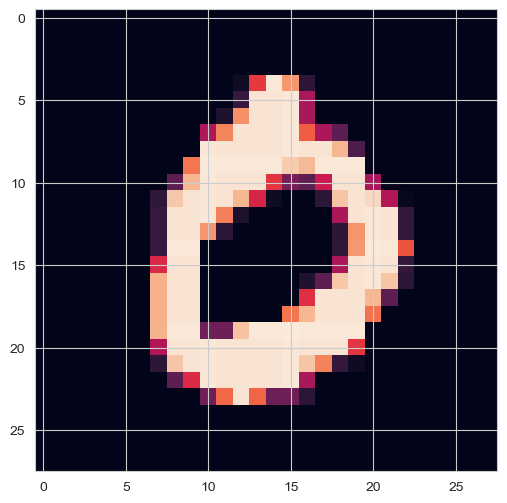

In [57]:
plt.imshow(my_number.reshape(28,28));

# örneğimi image olarak görebilmek için başlangıçtaki formuna yani 28,28 e çevirdim.

In [58]:
pred_prob = model.predict(my_number.reshape(1,28,28,1))
pred_prob

array([[9.9968004e-01, 2.3205666e-06, 6.8176931e-05, 9.2609390e-08,
        2.6312948e-08, 2.5183965e-06, 2.4013802e-04, 4.4882386e-06,
        1.5968593e-06, 6.9744056e-07]], dtype=float32)

In [59]:
# SHAPE --> (num_images,width,height,color_channels)
y_pred = np.argmax(pred_prob)
y_pred

0

In [60]:
model.save("cnn-1.h5py")

INFO:tensorflow:Assets written to: cnn-1.h5py\assets


# Using

In [62]:
model=tf.keras.models.load_model('cnn-1.h5py')

<IPython.core.display.Javascript object>

In [63]:
pred=model.predict(np.expand_dims(X_test[47],axis=0))

In [65]:
np.argmax(pred)

2

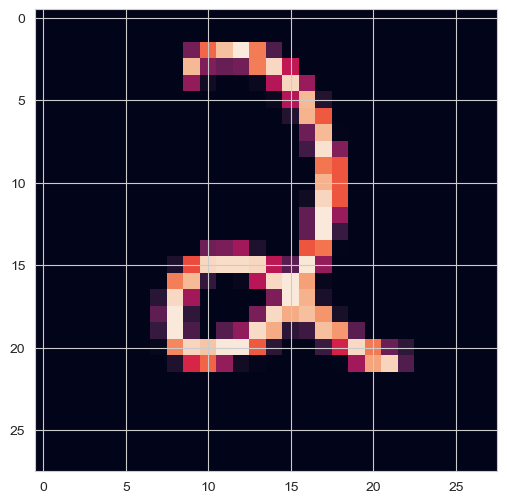

In [66]:
plt.imshow(X_test[47].reshape(28,28))

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___